In [1]:
SAVE = False #bool to enable figure saving

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from data_generation.geom_utils import graph_distance, euclidean_distance
from data_generation.spatial_firing import PlaceCell, gaussian
import matplotlib.patheffects as PathEffects
import pandas as pd
import seaborn as sns
from matplotlib.path import Path
import matplotlib.patches as patches

In [3]:
EXP_NAME = "experiment0"
path = "./data_generation/generated_data/" + EXP_NAME

path_ff_eucl = "./data_generation/generated_data/experiment0"
path_ff_graph = "./data_generation/generated_data/experiment1"

In [4]:
#IMPORT DATA
with open(path + "/maze.pkl", 'rb') as file:
    maze = pickle.load(file)
with open(path + "/trajectory.pkl", 'rb') as file:
    traj = pickle.load(file)
with open(path + "/placeCells.pkl", 'rb') as file:
    placeCells = pickle.load(file)
    
    
with open(path_ff_eucl + "/placeCells.pkl", 'rb') as file:
    placeCells_ffe = pickle.load(file)

with open(path_ff_graph + "/placeCells.pkl", 'rb') as file:
    placeCells_ffg = pickle.load(file)

# Maze

In [5]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

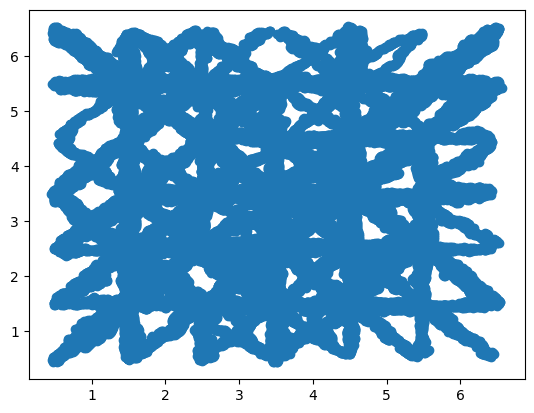

In [6]:
plt.scatter(traj.x_traj, traj.y_traj)

### Ploy maze configurations

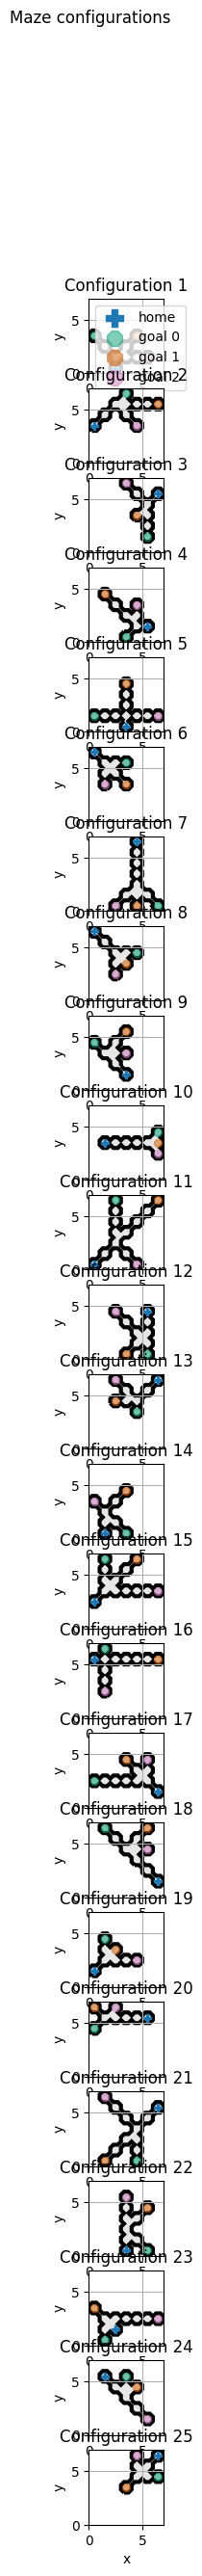

In [7]:
#MAZE
n_maze = 25
c = np.arange(placeCells.n_neurons)
nb_goals = 0
idx = 0
fig, axs = plt.subplots(n_maze,1 , figsize = (30, 30)) #, figsize=(150, 60)
plt.suptitle("Maze configurations")
col = sns.color_palette("colorblind")

for i in range(n_maze):
    axs[i].set_title("Configuration %s" %(i+1))
    axs[i].set_xlim([0, maze.N])
    axs[i].set_ylim([0, maze.N])
    axs[i].grid()
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].imshow(maze.trialMazeFlags[i, ::-1], cmap='Greys', alpha = 0.1, extent=[0, maze.N, 0, maze.N])
    
    patch = patches.PathPatch(maze.trialOctoMaze[i], facecolor='None', lw=3)
    axs[i].add_patch(patch)
    
    h = np.array(maze.nodeList[i]["A"]) + 0.5
    axs[i].scatter(h[0], h[1], label = "home", alpha = 1, marker = "P")
    gg = ["C", "D", "E"]
    for k in range(3): #goals
        g = np.array(maze.nodeList[i][gg[k]])+0.5
        axs[i].scatter(g[0], g[1], label = "goal %s"%k, color = col[k+2], marker = "8", alpha= 0.5)        
        
    
    nb_goals =3
    idx += nb_goals*traj.n_traj[i]

#handles, labels = axs[i].get_legend_handles_labels()
#fig.legend(handles, labels, loc=[0.895, 0.59])
lgnd = axs[0].legend(loc = "upper left")

for i in range(4):
    lgnd.legendHandles[i]._sizes = [150]

if SAVE:
    plt.savefig("figures/maze_configs.svg")
    plt.savefig("figures/maze_configs.jpg")

plt.show()

### Superimposed maze configurations


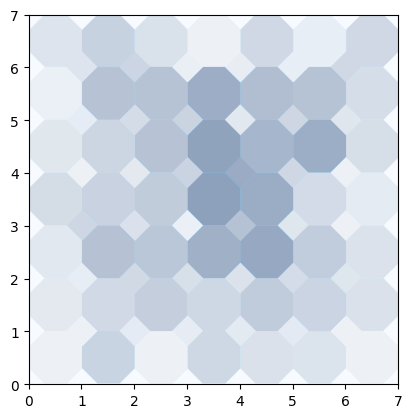

In [8]:
for i in range(maze.nb_of_trials):
    plt.imshow(maze.trialMazeFlags[i, ::-1], cmap='Blues', alpha = 0.1, extent=[0, maze.N, 0, maze.N])

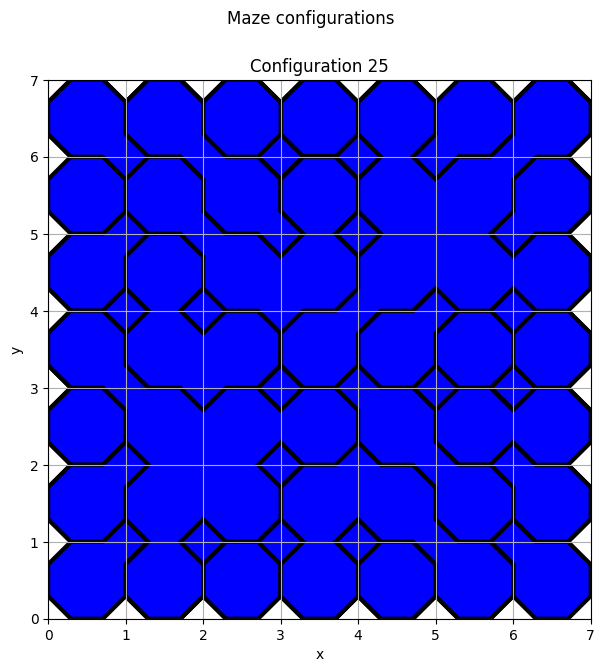

In [9]:
#MAZE
c = np.arange(placeCells.n_neurons)
nb_goals = 0
idx = 0
fig, ax = plt.subplots(1, 1,figsize=(7, 7))
plt.suptitle("Maze configurations")
col = sns.color_palette("colorblind")

ax.set_title("Configuration %s" %(i+1))

for i in range(maze.nb_of_trials):
    ax.set_xlim([0, maze.N])
    ax.set_ylim([0, maze.N])
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #ax.imshow(maze.trialMazeFlags[i, ::-1], cmap='Blues', alpha = 0.1, extent=[0, maze.N, 0, maze.N])
    
    patch = patches.PathPatch(maze.trialOctoMaze[i], facecolor='Blue', lw=3)
    ax.add_patch(patch)
    
    nb_goals =3
    idx += nb_goals*traj.n_traj[i]

plt.show()

# Trajectory

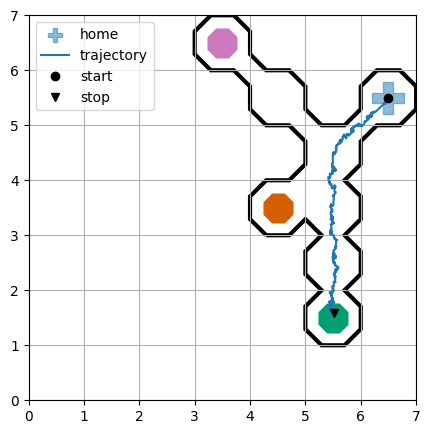

In [10]:
#TRAJ
maze_id = 2
nb_goals = 0
idx = 0
fig, ax = plt.subplots(figsize = [5, 5])

    
patch = patches.PathPatch(maze.trialOctoMaze[maze_id], facecolor='None', lw=3)
ax.add_patch(patch)
    
h = np.array(maze.nodeList[maze_id]["A"]) + 0.5
plt.scatter(h[0], h[1], label = "home", s = 500, alpha = 0.5, marker = "P")
gk = ["C", "D", "E"]
for k in range(3): #goals
    g = np.array(maze.nodeList[maze_id][gk[k]])+0.5
    plt.scatter(g[0], g[1], s = 500, color = col[k+2], marker = "8", alpha= 1) 
   
plt.plot(traj.x_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]],
            traj.y_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]], label="trajectory")
plt.plot(traj.x_traj[traj.traj_cut_idx[maze_id*6]], traj.y_traj[traj.traj_cut_idx[maze_id*6]], 'ko', label="start")
plt.plot(traj.x_traj[traj.traj_cut_idx[maze_id*6+1] - 1], traj.y_traj[traj.traj_cut_idx[maze_id*6+1] - 1], 'kv',
         label="stop")
plt.xlim([0, maze.N])
plt.ylim([0, maze.N])
plt.grid()

lgnd = plt.legend()
for i in range(4):
    lgnd.legendHandles[i]._sizes = [100]


plt.savefig("figures/traj_p2p_example.svg")
plt.show()

# Firing fields

In [11]:
placeCells = placeCells_ffe
hyp = placeCells.hyp
RES = 50

In [31]:
placeCells_ffe.fieldCenters[:,-2, :] = np.repeat(np.array([[3.45, 1.7]]), 25, axis = 0).T
placeCells_ffe.fieldCenters[:, -4, :] = np.repeat(np.array([[4.99, 3.9]]), 25, axis = 0).T
placeCells_ffe.fieldCenters[:, -7, :] = np.repeat(np.array([[5.8, 5.2]]), 25, axis = 0).T

In [36]:
placeCells_ffg.fieldCenters[:, 9, :] = np.repeat(np.array([[5.8, 4.6]]), 25, axis = 0).T
placeCells_ffg.fieldCenters[:, 6, :] = np.repeat(np.array([[3.5, 3.5]]), 25, axis = 0).T
placeCells_ffg.fieldCenters[:, 3, :] = np.repeat(np.array([[5.3, 3.9]]), 25, axis = 0).T

In [90]:
##GENERATE FIRING FIELDS (EUCL)
for i in range(5): #mazeconfig
    print("config %s of %s" %(i+1, maze.nb_of_trials))

    firing_field_2d = np.zeros((maze.N * RES, maze.N * RES, placeCells.n_neurons))
    pos_x = np.linspace(0, 7, RES*7)
    pos_y = np.linspace(0, 7, RES*7)

    for k in range(len(pos_x)):
        for j in range(len(pos_y)):
            d = euclidean_distance(np.expand_dims(np.array([pos_x[k], pos_y[j]]), axis = -1), placeCells.fieldCenters[:, :, i])
            firing_field_2d[k, j , :] = gaussian(d, placeCells.std, placeCells.nu_max)

    with open("./data_generation/saved_fields/" + hyp + str(i) + "_ffe", "wb") as file:
        pickle.dump(firing_field_2d, file)
   

config 1 of 25
config 2 of 25
config 3 of 25
config 4 of 25
config 5 of 25


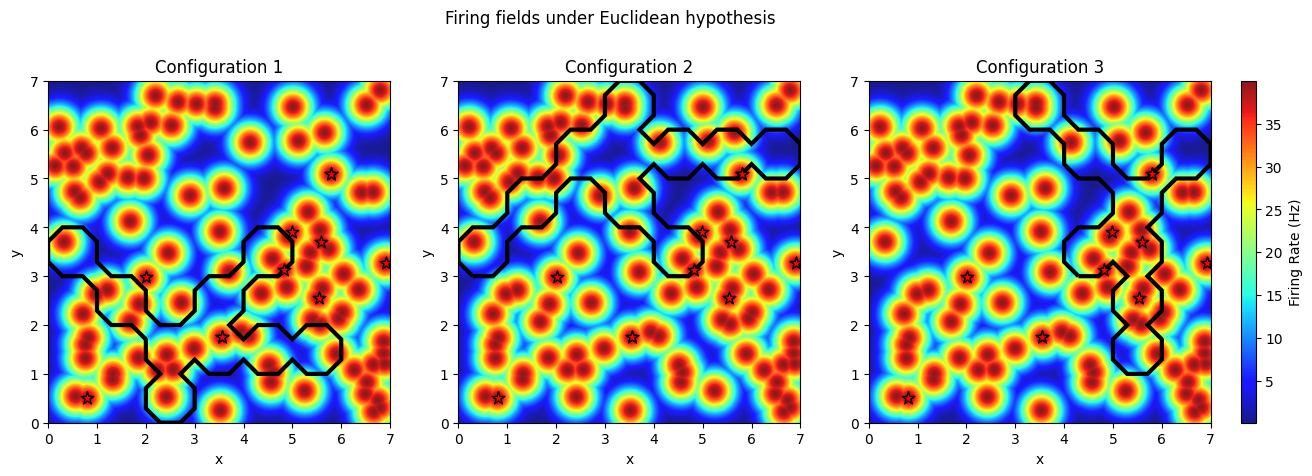

In [112]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.legend_handler import HandlerTuple

n_maze = 3
sel_n_e = [1, 2, 3]

path_to_fields = "./data_generation/saved_fields/"


with open(path + "/maze.pkl", 'rb') as file:
    maze = pickle.load(file)

fields_e = []
for i in range(n_maze):    
    with open(path_to_fields + hyp + str(i) + "_ffe", 'rb') as file:
        field = pickle.load(file)
    fields_e.append(field[:, :, :])
    
L = field.shape[0]
RES = int(L/maze.N)

fig, axs = plt.subplots(1, n_maze, figsize = (15, 5))
#plt.title("Firing fields, maze config %s" %i)
plt.suptitle("Firing fields under Euclidean hypothesis")
n_numbering = [1, 0, 2]

for i in range(n_maze):
    #flags = maze.polygon_to_flags(maze.trialOctoMaze[i], res = RES) #TODO change pol2flag fct (and test)
    patch = patches.PathPatch(maze.trialOctoMaze[i], facecolor='None', lw=3)
    axs[i].add_patch(patch)
    axs[i].set_xlim([0,7])
    axs[i].set_ylim([0,7])
    axs[i].set_title("Configuration %s" %(i+1))
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")

    p1 = axs[i].scatter(placeCells.fieldCenters[0, :11, i], placeCells.fieldCenters[1, :11, i], marker='*',edgecolors='k',
                   c='r', s = 90)
    #p2 = axs[i].scatter(pCtot.fieldCenters[0, :, i], pCtot.fieldCenters[1, :, i], marker='*',
    #               c='grey', s = 90, alpha = 0.5)

    """for t in range(len(placeCells.fieldCenters[0, :, i])):
        txt = axs[i].text(placeCells.fieldCenters[0, t, i]+0.1,placeCells.fieldCenters[1, t, i]+0.1,'N%s'%t)
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])"""

    #axs[i].imshow(flags[::-1], cmap='Greens', extent=[0, L, 0, L], interpolation='nearest')
    
    im = axs[i].imshow(fields_e[i].max(axis = -1).T[::-1], cmap = 'jet',
           extent=[0,7, 0,7], interpolation='bilinear', alpha = 0.9)
    #axs[i].legend( [(p1, p2)], ["place field centers"], loc = "upper left", handler_map={tuple: HandlerTuple(ndivide=None)})
    
ax = axs[-1]
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.01,ax.get_position().height])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Firing Rate (Hz)")
    
plt.savefig("./figures/fields_eucl.svg")
plt.savefig("./figures/fields_eucl.jpg")
plt.show()

In [ ]:
placeCells = placeCells_ffg
hyp = placeCells.hyp
RES = 50

In [ ]:
##GENERATE FIRING FIELDS (Graph)
n_maze = 5
for i in range(n_maze): #mazeconfig
    firing_field_2d = np.zeros((maze.N * RES, maze.N * RES, placeCells.n_neurons))

    flags = maze.polygon_to_flags(maze.trialOctoMaze[i], res = RES) #TODO change pol2flag fct (and test)
    idx_in_maze = np.where(flags)
    pos_in_maze_x = idx_in_maze[1]/RES
    pos_in_maze_y = idx_in_maze[0]/RES

    #make cells fire
    X = np.array([pos_in_maze_x, pos_in_maze_y])

    for k in range(len(pos_in_maze_x)):
        print("pos %s of %s" %(k, len(pos_in_maze_x)))

        idx = idx_in_maze[0][k]
        idy = idx_in_maze[1][k]
        d = graph_distance(maze, i, np.expand_dims(X[:, k], axis = -1), placeCells.fieldCenters[:, :, i])
        firing_field_2d[idx, idy , :] = gaussian(d, placeCells.std, placeCells.nu_max)
        
      

    with open("./data_generation/saved_fields/" + hyp + str(i) + "_ffg", "wb") as file:
        pickle.dump(firing_field_2d, file)
   

In [ ]:
field.shape

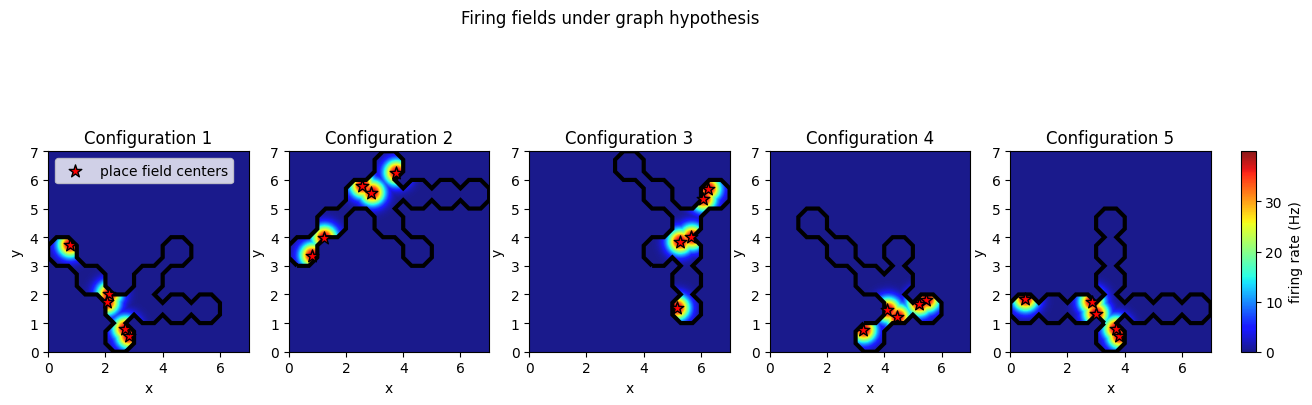

In [54]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

path_to_fields = "./data_generation/saved_fields/"
n_maze = 5

with open(path + "/maze.pkl", 'rb') as file:
    maze = pickle.load(file)

fields_g = []
for i in range(n_maze):    
    with open(path_to_fields + hyp + str(i) + "_ffg", 'rb') as file:
        field = pickle.load(file)

    fields_g.append(field[:, :, :5])
    
L = field.shape[0]
RES = int(L/maze.N)
n_numbering = [2, 1, 0]


fig, axs = plt.subplots(1,n_maze, figsize = (15, 5))

plt.suptitle("Firing fields under graph hypothesis")
for i in range(n_maze):
    #flags = maze.polygon_to_flags(maze.trialOctoMaze[i], res = RES) #TODO change pol2flag fct (and test)
    patch = patches.PathPatch(maze.trialOctoMaze[i], facecolor='None', lw=3)
    axs[i].add_patch(patch)
    axs[i].set_xlim([0,7])
    axs[i].set_ylim([0,7])
    axs[i].set_title("Configuration %s" %(i+1))
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    
    p1 = axs[i].scatter(placeCells.fieldCenters[0, :5, i], placeCells.fieldCenters[1, :5, i], marker='*',edgecolors='k',
                   c='r', s = 90)

    """for t in range(len(placeCells.fieldCenters[0, :, i])):
        txt = axs[i].text(placeCells.fieldCenters[0, t, i]+0.1,placeCells.fieldCenters[1, t, i]+0.1,'N%s'%n_numbering[t], c="k",
                    weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])"""

        

    im = axs[i].imshow(fields_g[i].max(axis = -1)[::-1], cmap = 'jet',
           extent=[0,7, 0,7], interpolation='bilinear', alpha = 0.9)
    
axs[0].legend( [(p1)], ["place field centers"], loc = "upper left")


ax = axs[-1]
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.01,ax.get_position().height])
cb = plt.colorbar(im, cax=cax)
cb.set_label("firing rate (Hz)")
    
#plt.savefig("./figures/fields_graph.svg")
#plt.savefig("./figures/fields_graph.jpg")
plt.show()

# Firing Rates


In [32]:
from matplotlib.pyplot import yticks

In [33]:
#Firing rates for eucl hyp
placeCells = placeCells_ffe
X = np.array([traj.x_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]], traj.y_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]]])
FR = placeCells_ffe.fire(maze, maze_id, X)
#FR = np.array([FR[:, 1], FR[:, 0], FR[:, 2]])

In [34]:
FR = FR[:, -11:]

alpha = np.ones(FR.shape)*0.3

for _, i in enumerate([-2, -4, -7]):
    alpha[:, i] = np.ones(FR.shape[0])

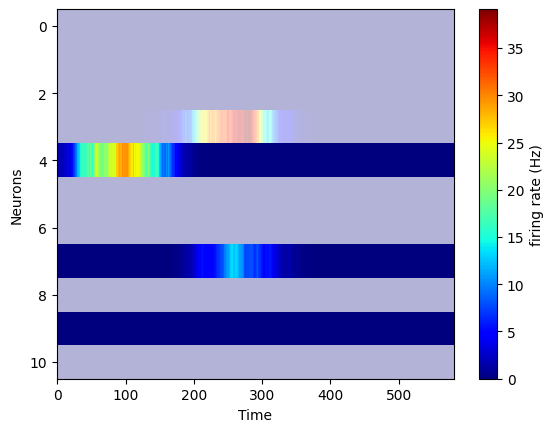

In [35]:
plt.figure()
#plt.imshow(placeCells.firingRates[traj.traj_cut_idx[0]:traj.traj_cut_idx[1], :].T, interpolation='nearest', aspect='auto', cmap = "jet")
plt.imshow(FR.T, interpolation='nearest',  aspect='auto', cmap = "jet", alpha = alpha.T)
#plt.title("Firing rates during a trajectory (Euclidean hypothesis)")
plt.xlabel("Time")
plt.ylabel("Neurons")
cb = plt.colorbar()
cb.set_label("firing rate (Hz)")


#yticks([0, 1, 2], ['N0', 'N1', 'N2'],
#       rotation=0) 

plt.savefig("./figures/firingrates_e.svg")
plt.savefig("./figures/firingrates_e.jpg")
plt.show()

In [58]:
"""fig, ax = plt.subplots(figsize = [5, 5])
patch = patches.PathPatch(maze.trialOctoMaze[0], facecolor='None', lw=3)
ax.add_patch(patch)
ax.scatter(placeCells.fieldCenters[0, :, 0], placeCells.fieldCenters[1, :, 0], marker='*', s = 200,
                   c='r', edgecolors = 'k', label="place field centers", zorder = 2)
plt.plot(traj.x_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]],
            traj.y_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]], label="trajectory", zorder = 1, c = col[0])
plt.plot(traj.x_traj[traj.traj_cut_idx[15]], traj.y_traj[traj.traj_cut_idx[15]], 'ko', label="start")
plt.plot(traj.x_traj[traj.traj_cut_idx[16] - 1], traj.y_traj[traj.traj_cut_idx[16] - 1], 'kv',
         label="stop")
plt.xlim([0, maze.N])
plt.ylim([0, maze.N])
plt.grid()

n_numbering = [1, 0, 2]
for t in range(3):
    txt = ax.text(placeCells.fieldCenters[0, t, 0]+0.1,placeCells.fieldCenters[1, t, 0]+0.1,'N%s'%n_numbering[t], c="k",
                weight = "bold")
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])

ff = fields_e[0].max(axis = -1).T[::-1]

ff[ff<0] = None

#im = ax.imshow(ff, cmap = 'jet',
#           extent=[0,7, 0,7], interpolation='bilinear', alpha =0.3, zorder = -1)


lgnd = plt.legend()
for i in range(4):
    lgnd.legendHandles[i]._sizes = [100]

    
plt.savefig("./figures/corr_traj_e.svg")
plt.savefig("./figures/corr_traj_e.jpg")

plt.show()"""

'fig, ax = plt.subplots(figsize = [5, 5])\npatch = patches.PathPatch(maze.trialOctoMaze[0], facecolor=\'None\', lw=3)\nax.add_patch(patch)\nax.scatter(placeCells.fieldCenters[0, :, 0], placeCells.fieldCenters[1, :, 0], marker=\'*\', s = 200,\n                   c=\'r\', edgecolors = \'k\', label="place field centers", zorder = 2)\nplt.plot(traj.x_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]],\n            traj.y_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]], label="trajectory", zorder = 1, c = col[0])\nplt.plot(traj.x_traj[traj.traj_cut_idx[15]], traj.y_traj[traj.traj_cut_idx[15]], \'ko\', label="start")\nplt.plot(traj.x_traj[traj.traj_cut_idx[16] - 1], traj.y_traj[traj.traj_cut_idx[16] - 1], \'kv\',\n         label="stop")\nplt.xlim([0, maze.N])\nplt.ylim([0, maze.N])\nplt.grid()\n\nn_numbering = [1, 0, 2]\nfor t in range(3):\n    txt = ax.text(placeCells.fieldCenters[0, t, 0]+0.1,placeCells.fieldCenters[1, t, 0]+0.1,\'N%s\'%n_numbering[t], c="k",\n                weight = "bo

In [37]:
placeCells = placeCells_ffg
X = np.array([traj.x_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]], traj.y_traj[traj.traj_cut_idx[maze_id*6]:traj.traj_cut_idx[maze_id*6+1]]])
FR = placeCells.fire(maze, maze_id, X)
#FR = np.array([FR[:, 1], FR[:, 0], FR[:, 2]])

In [38]:
FR = FR[:, :11]

alpha = np.ones(FR.shape)*0.3

for _, i in enumerate([9, 6, 3]):
    alpha[:, i] = np.ones(FR.shape[0])

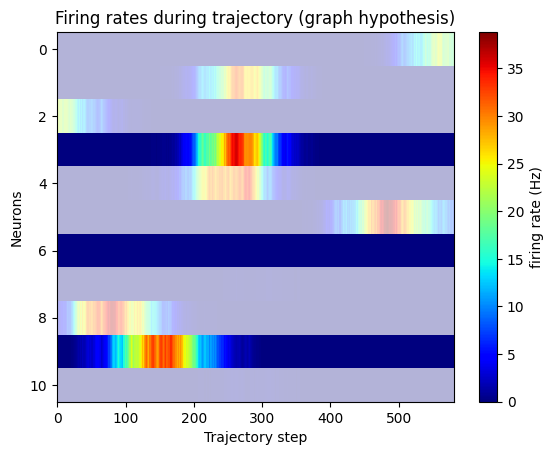

In [39]:
plt.figure()
#plt.imshow(placeCells.firingRates[traj.traj_cut_idx[0]:traj.traj_cut_idx[1], :].T, interpolation='nearest', aspect='auto', cmap = "jet")
plt.imshow(FR.T, interpolation='nearest',  aspect='auto', cmap = "jet", alpha = alpha.T)
plt.title("Firing rates during trajectory (graph hypothesis)")
plt.xlabel("Trajectory step")
plt.ylabel("Neurons")
cb = plt.colorbar()
cb.set_label("firing rate (Hz)")


#yticks([0, 1, 2], ['N0', 'N1', 'N2'],
#       rotation=0) 

plt.savefig("./figures/firingrates_g.svg")
plt.savefig("./figures/firingrates_g.jpg")

plt.show()

In [64]:
"""fig, ax = plt.subplots(figsize = [5, 5])
ax.set_title("Example of a trajectory (graph hypothesis)")
patch = patches.PathPatch(maze.trialOctoMaze[0], facecolor='None', lw=3)
ax.add_patch(patch)
    
h = np.array(maze.homes[0]) + 0.5
plt.scatter(h[0], h[1], s = 500, alpha = 1, marker = "P")
for k in range(3): #goals
    g = np.array(maze.goals[0][k])+0.5
    plt.scatter(g[0], g[1], s = 500, color = col[k+2], marker = "8", alpha= 0.5) 

ax.scatter(placeCells.fieldCenters[0, :, 0], placeCells.fieldCenters[1, :, 0], marker='*', s = 200,
                   c='r', edgecolors = 'k', label="place field centers", zorder = 2)

plt.plot(traj.x_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]],
            traj.y_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]], label="trajectory", zorder = 1, c = col[0])
plt.plot(traj.x_traj[traj.traj_cut_idx[15]], traj.y_traj[traj.traj_cut_idx[15]], 'ko', label="start")
plt.plot(traj.x_traj[traj.traj_cut_idx[16] - 1], traj.y_traj[traj.traj_cut_idx[16] - 1], 'kv',
         label="stop")
plt.xlim([0, maze.N])
plt.ylim([0, maze.N])
plt.grid()




n_numbering = [2, 1, 0]
for t in range(3):
    txt = ax.text(placeCells.fieldCenters[0, t, 0]+0.1,placeCells.fieldCenters[1, t, 0]+0.1,'N%s'%n_numbering[t], c="k",
                weight = "bold")
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])

ff = fields_e[0].max(axis = -1).T[::-1]

ff[ff<0] = None

#im = ax.imshow(ff, cmap = 'jet',
#           extent=[0,7, 0,7], interpolation='bilinear', alpha =0.3, zorder = -1)


lgnd = plt.legend()
for i in range(4):
    lgnd.legendHandles[i]._sizes = [100]

    
plt.savefig("./figures/corr_traj_g.svg")
plt.savefig("./figures/corr_traj_g.jpg")

plt.show()"""

'fig, ax = plt.subplots(figsize = [5, 5])\nax.set_title("Example of a trajectory (graph hypothesis)")\npatch = patches.PathPatch(maze.trialOctoMaze[0], facecolor=\'None\', lw=3)\nax.add_patch(patch)\n    \nh = np.array(maze.homes[0]) + 0.5\nplt.scatter(h[0], h[1], s = 500, alpha = 1, marker = "P")\nfor k in range(3): #goals\n    g = np.array(maze.goals[0][k])+0.5\n    plt.scatter(g[0], g[1], s = 500, color = col[k+2], marker = "8", alpha= 0.5) \n\nax.scatter(placeCells.fieldCenters[0, :, 0], placeCells.fieldCenters[1, :, 0], marker=\'*\', s = 200,\n                   c=\'r\', edgecolors = \'k\', label="place field centers", zorder = 2)\n\nplt.plot(traj.x_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]],\n            traj.y_traj[traj.traj_cut_idx[15]:traj.traj_cut_idx[16]], label="trajectory", zorder = 1, c = col[0])\nplt.plot(traj.x_traj[traj.traj_cut_idx[15]], traj.y_traj[traj.traj_cut_idx[15]], \'ko\', label="start")\nplt.plot(traj.x_traj[traj.traj_cut_idx[16] - 1], traj.y_traj[traj

# Graph vs Eucl distance


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


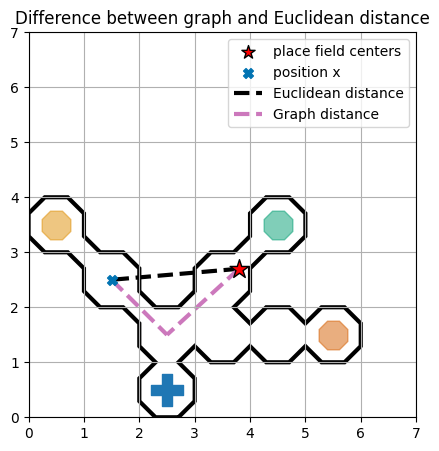

In [65]:
fig, ax = plt.subplots(figsize = [5, 5])
ax.set_title("Difference between graph and Euclidean distance")
patch = patches.PathPatch(maze.trialOctoMaze[0], facecolor='None', lw=3)
ax.add_patch(patch)
    
h = np.array(maze.homes[0]) + 0.5
plt.scatter(h[0], h[1], s = 500, alpha = 1, marker = "P")
for k in range(3): #goals
    g = np.array(maze.goals[0][k])+0.5
    plt.scatter(g[0], g[1], s = 500, color = col[k+1], marker = "8", alpha= 0.5) 

ax.scatter(3.8, 2.7, marker='*', s = 200,
                   c='r', edgecolors = 'k', label="place field centers", zorder = 2)



plt.scatter([1.5], [2.5], zorder = 1, c = col[0], marker='X', label = "position x", s=50)
''
plt.plot([3.8, 1.5], [2.7,2.5], "--", zorder = -1,   linewidth=3, c = "k", label = "Euclidean distance")

plt.plot([3.8, 2.5], [2.7,1.5], "--", zorder = -1,   linewidth=3, c = col[4], label = "Graph distance")
plt.plot([1.5, 2.5], [2.5,1.5], "--", zorder = -1, c = col[4],  linewidth=3)

plt.xlim([0, maze.N])
plt.ylim([0, maze.N])
plt.grid()




lgnd = plt.legend()
for i in range(1):
    lgnd.legendHandles[i]._sizes = [100]

    
plt.savefig("./figures/graph_vs_eucl.svg")
plt.savefig("./figures/graph_vs_eucl.jpg")

plt.show()